In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('cleaned_churn_dataset.csv') # loading the cleaned dataset

## Encoding:

Dataset has no categorical column so I skipped encoding becasue there is no need for it.

## Train/Test Data

I have separate the features (X) and target variable (y) then split the dataset into training and testing sets.
This helped in training model on one portion of the data and evaluate how well it performs on unseen data.

In [ ]:
# Separating features vs. target columns
X = df.drop(columns='Churn', axis =1)
Y = df['Churn']

# Splitting the data for Training and Testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [4]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((53388, 28), (13348, 28), (53388,), (13348,))

## Training RandomForestClassifier on Data

I have train a *Random Forest Classifier* to predict customer churn.

Random Forest works by training multiple decision trees and combining their predictions, making it more accurate and stable. It also provides feature importance scores allowing us to understand which factors influence churn the most.

In [5]:
RF = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42, n_jobs= -1 )

RF.fit(X_train, Y_train)

Y_prediction_RF = RF.predict(X_test)

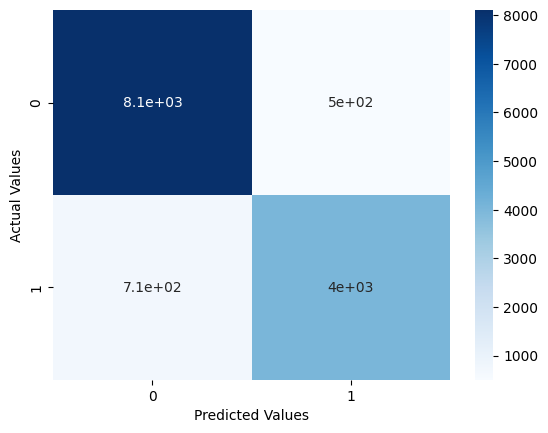

In [6]:
# Confusion Matrix

cm = confusion_matrix(Y_test, Y_prediction_RF)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [7]:
# Classification Report & Accuracy
print('classification_report:')
print(classification_report(Y_test, Y_prediction_RF))

accuracy = accuracy_score(Y_test, Y_prediction_RF)
print(f'Accuracy Score: {accuracy * 100:.2f}% ')

classification_report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      8603
           1       0.89      0.85      0.87      4745

    accuracy                           0.91     13348
   macro avg       0.90      0.90      0.90     13348
weighted avg       0.91      0.91      0.91     13348

Accuracy Score: 90.90% 


## Feature Importance

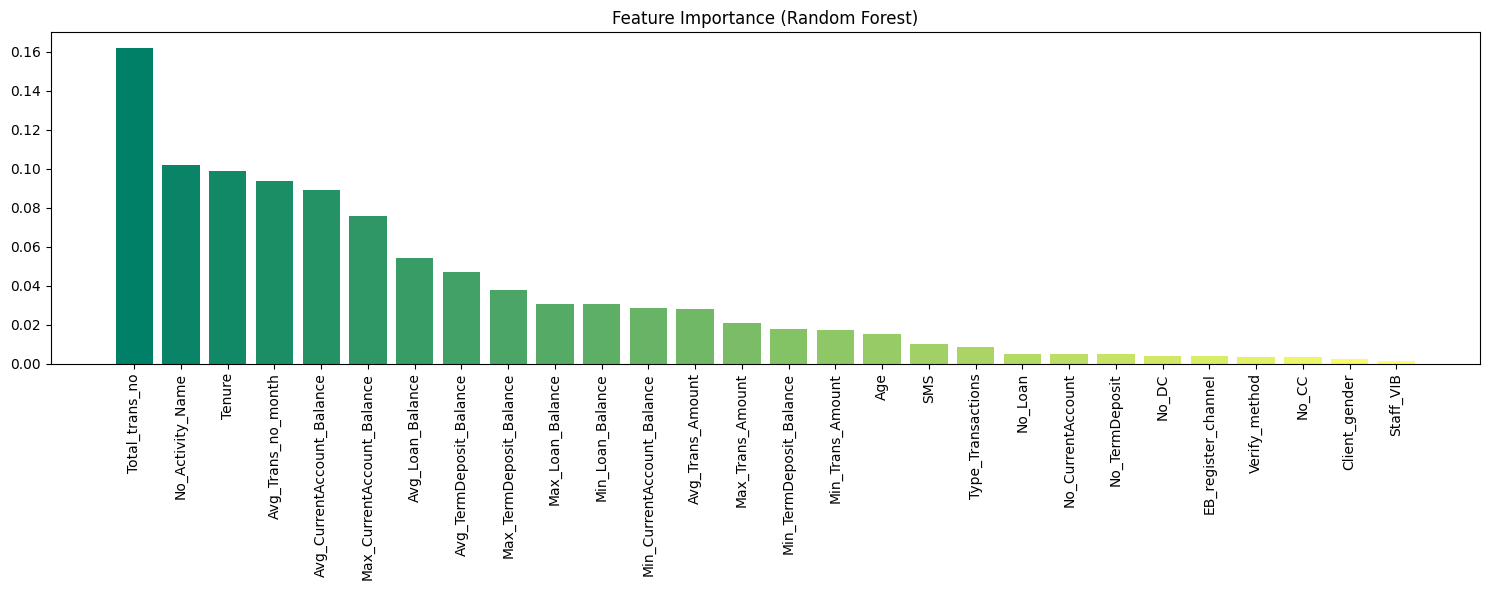

In [11]:
importances = RF.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15,6))
plt.title("Feature Importance (Random Forest)")

# apply colormap
colors = plt.cm.summer(np.linspace(0, 1, len(importances)))

plt.bar(range(len(importances)), importances[indices], color=colors)
plt.xticks(range(len(importances)), X.columns[indices], rotation=90)

plt.tight_layout()
plt.show()

## Closing Words:

Based on the Random Forest feature importance results the strongest factors influencing churn are related to customer activity and engagement, such as total transactions, variety of activities, and monthly transaction frequency. 

Overall, the model clearly highlights that customer engagement is the primary driver of churn, and the bank can reduce churn by increasing transaction activity, improving digital engagement, and providing personalized services to low-activity customers.